In [46]:
#Importing the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [58]:
weatherData =pd.read_csv("Summary of Weather.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
weatherData .describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [66]:
# Shape of the dataframe.
weatherData.shape

# Data type of each column.
weatherData.dtypes

# Number of null values.
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

To better understand the distribution of the variables Height and Weight, we can simply plot both variables using histograms. Histograms are plots that show the distribution of a numeric variable, grouping data into bins. The height of the bar represents the number of observations per bin.



Text(0, 0.5, 'Frequency')

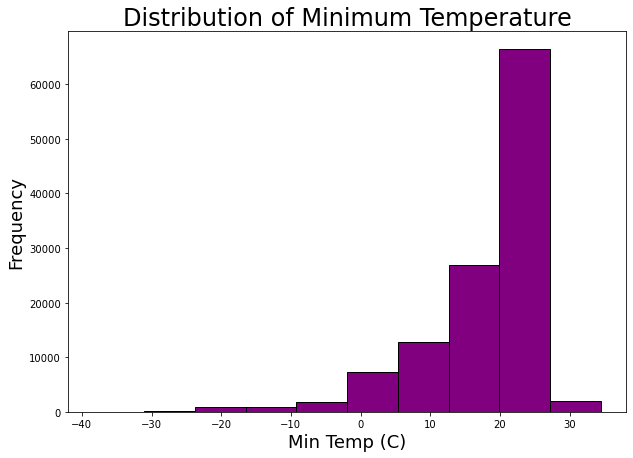

In [67]:

# Histogram of the Minimum Temperature
weatherData.MinTemp.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Minimum Temperature', size=24)
plt.xlabel('Min Temp (C)', size=18)
plt.ylabel('Frequency', size=18)

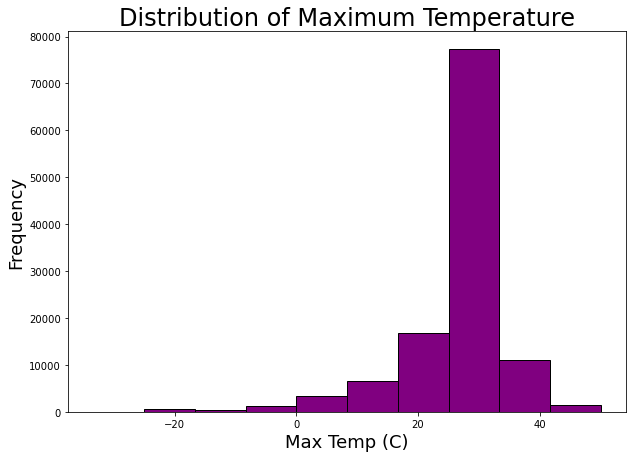

In [68]:
# Histogram of the Maximum Temperature
weatherData.MaxTemp.plot(kind='hist',color='purple',edgecolor='black',figsize=(10,7))
plt.title('Distribution of Maximum Temperature', size=24)
plt.xlabel('Max Temp (C)', size=18)
plt.ylabel('Frequency', size=18);

In [179]:
dailyMin = weatherData[['MinTemp']]
dailyMax = weatherData[['MaxTemp']]

# X=weatherData['MinTemp'].values.reshape(-1,1)
# y=weatherData['MaxTemp'].values.reshape(-1,1)

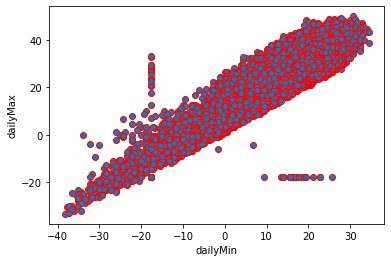

In [180]:
plt.scatter(dailyMin, dailyMax, edgecolors='r')
plt.xlabel('dailyMin')
plt.ylabel('dailyMax')
plt.show()

In [181]:
#correlation
weatherData['MinTemp'].corr(weatherData['MaxTemp'], method = 'pearson')

0.8783839059497573

In [182]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dailyMin,dailyMax,test_size=0.2,random_state=0)

In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [184]:
#to retrive the intercept:
lr.intercept_

array([10.66185201])

In [185]:
lr.coef_

array([[0.92033997]])

In [215]:
prediction = lr.predict(x_test)
prediction

array([[33.67035117],
       [30.0912513 ],
       [26.51215143],
       ...,
       [32.64775121],
       [30.60255128],
       [31.62515124]])

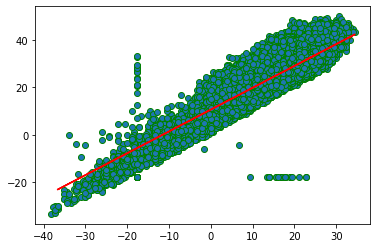

In [221]:
plt.scatter(x_train,y_train,edgecolors='g')
plt.plot(x_test,prediction,color='r')
plt.show()
plt.show()


In [198]:
# y_test_val=y_test.values.flatten()
# y_test_val

In [197]:
# y_pred_val=y_pred.flatten()
# y_pred_val